In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../data/data_04_may_2016.csv')

In [3]:
data

,name,section,query,name.1,name_desc,desc,lib,return_vals,env,files,exit_status,diagnostics,errors,md5_hash,machine,total_score
0,ls,1,List file,0.000000,0.082083,0.000005,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.122902
1,signbit,3,test,0.000000,0.230330,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.681851
2,madvise,2,vm,0.000000,0.000000,0.000061,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000079
3,uvm,9,vm,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000079
4,kill,2,sig,0.000000,0.000000,0.000079,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000038,0.0,0.0,0.000438
5,rump.dhcpclient,1,Rump,2.391961,0.184868,0.000994,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.645020
6,rump,7,Rump,4.422872,0.221562,0.000587,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.645020
7,mk.conf,5,Rump,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.645020
8,fdisk,8,chdk,0.000000,0.000000,0.000270,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000270
9,i2cscan,8,iic,0.000000,2.953071,0.005218,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.584190


In [4]:
data.describe()

,name.1,name_desc,desc,lib,return_vals,env,files,exit_status,diagnostics,errors,md5_hash,machine,total_score
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.0,833.000000,833.000000
mean,4.952425,0.130644,0.000973,0.000408,0.000016,0.003084,0.000267,0.001263,0.005522,0.000132,0.0,0.001015,8.396721
std,5.919039,0.423211,0.003298,0.007566,0.000154,0.008438,0.001871,0.003217,0.056579,0.001063,0.0,0.013071,5.598393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.425255
50%,0.650481,0.000000,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.660518
75%,10.217565,0.025567,0.000586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,13.065621
max,21.076316,5.207017,0.042552,0.168964,0.003423,0.088175,0.048035,0.013688,1.371927,0.019230,0.0,0.169120,24.000566


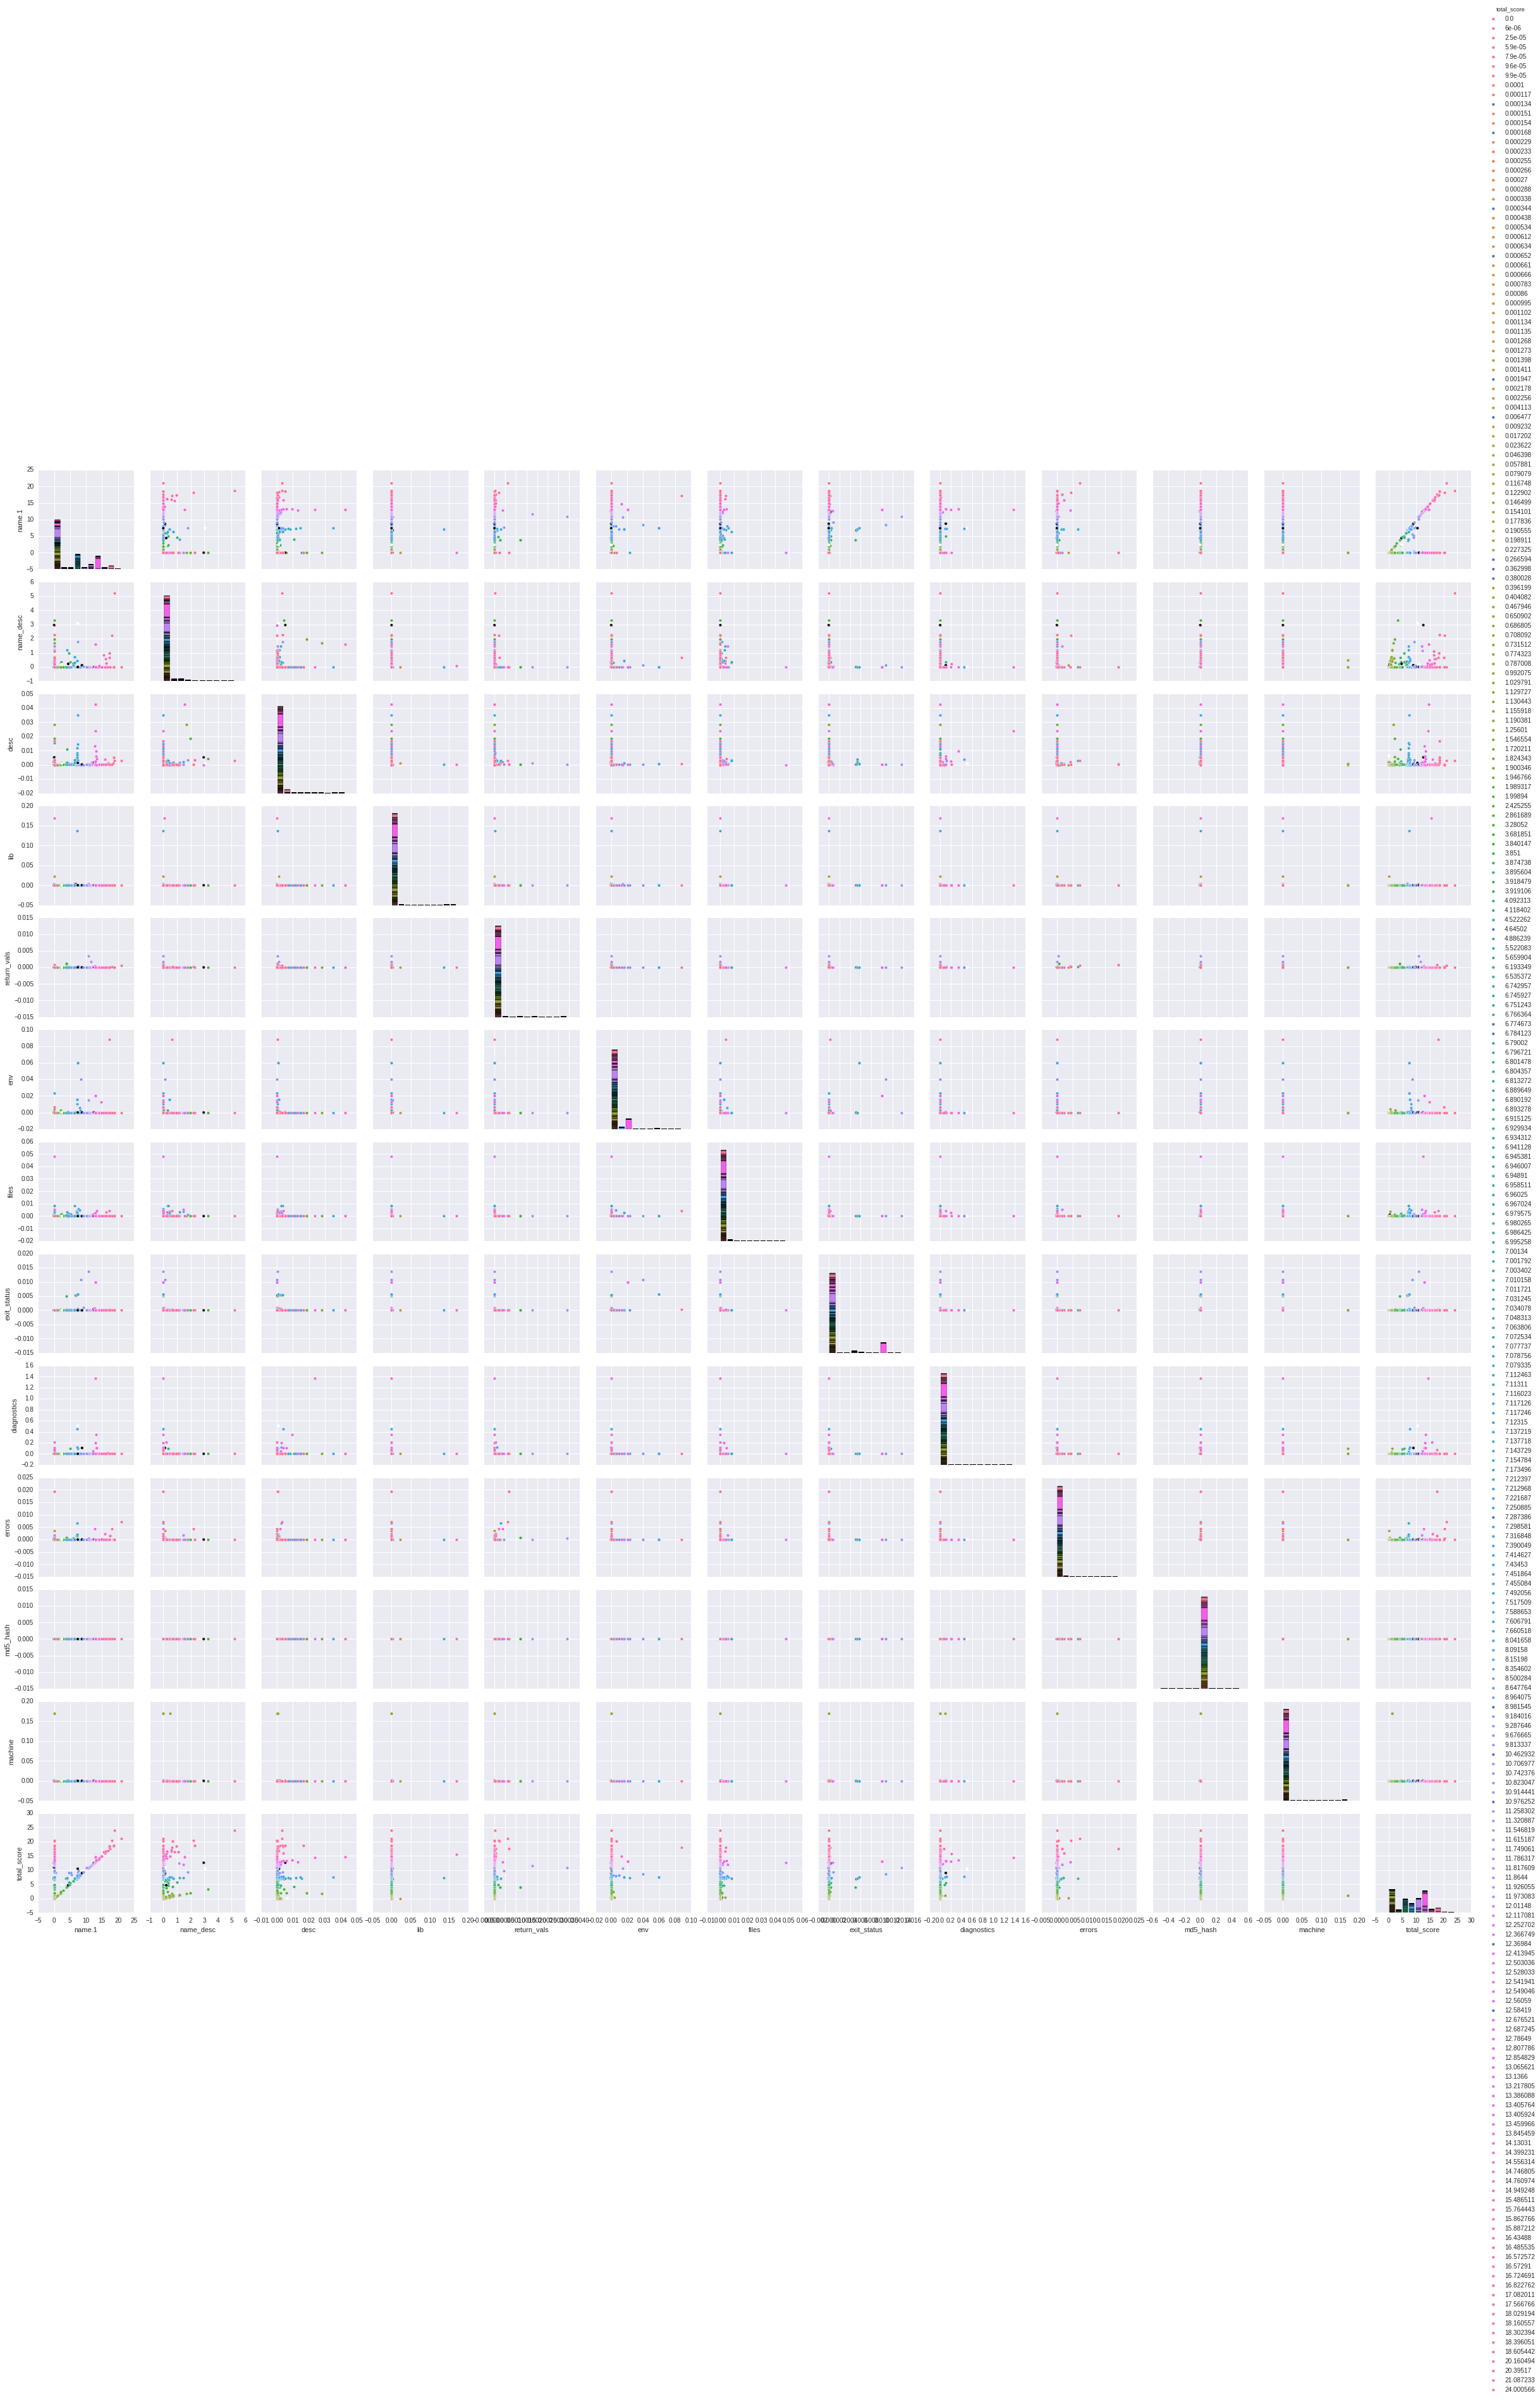

In [5]:
sns.pairplot(data, hue='total_score')

In [6]:
data = data.drop('md5_hash', axis=1)

In [7]:
data.columns

Index(['name', 'section', 'query', 'name.1', 'name_desc', 'desc', 'lib',
       'return_vals', 'env', 'files', 'exit_status', 'diagnostics', 'errors',
       'machine', 'total_score'],
      dtype='object')

In [10]:
df = data.drop(['name', 'section', 'query'], axis=1)
data_norm = (df - df.mean()) / (df.max() - df.min())


In [11]:
data_norm

,name.1,name_desc,desc,lib,return_vals,env,files,exit_status,diagnostics,errors,machine,total_score
0,-0.234976,-0.009326,-0.022747,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,-0.344734
1,-0.234976,0.019144,-0.022865,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,-0.196448
2,-0.234976,-0.025090,-0.021431,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,-0.349852
3,-0.234976,-0.025090,-0.022747,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,-0.349852
4,-0.234976,-0.025090,-0.021008,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.004879,-0.006002,-0.349837
5,-0.121485,0.010414,0.000495,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,-0.156317
6,-0.025125,0.017461,-0.009070,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,-0.156317
7,-0.234976,-0.025090,-0.022747,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,-0.156317
8,-0.234976,-0.025090,-0.016520,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,-0.349844
9,-0.234976,0.542043,0.099762,-0.002414,-0.004758,-0.034970,-0.005550,-0.092285,-0.004025,-0.006855,-0.006002,0.174474


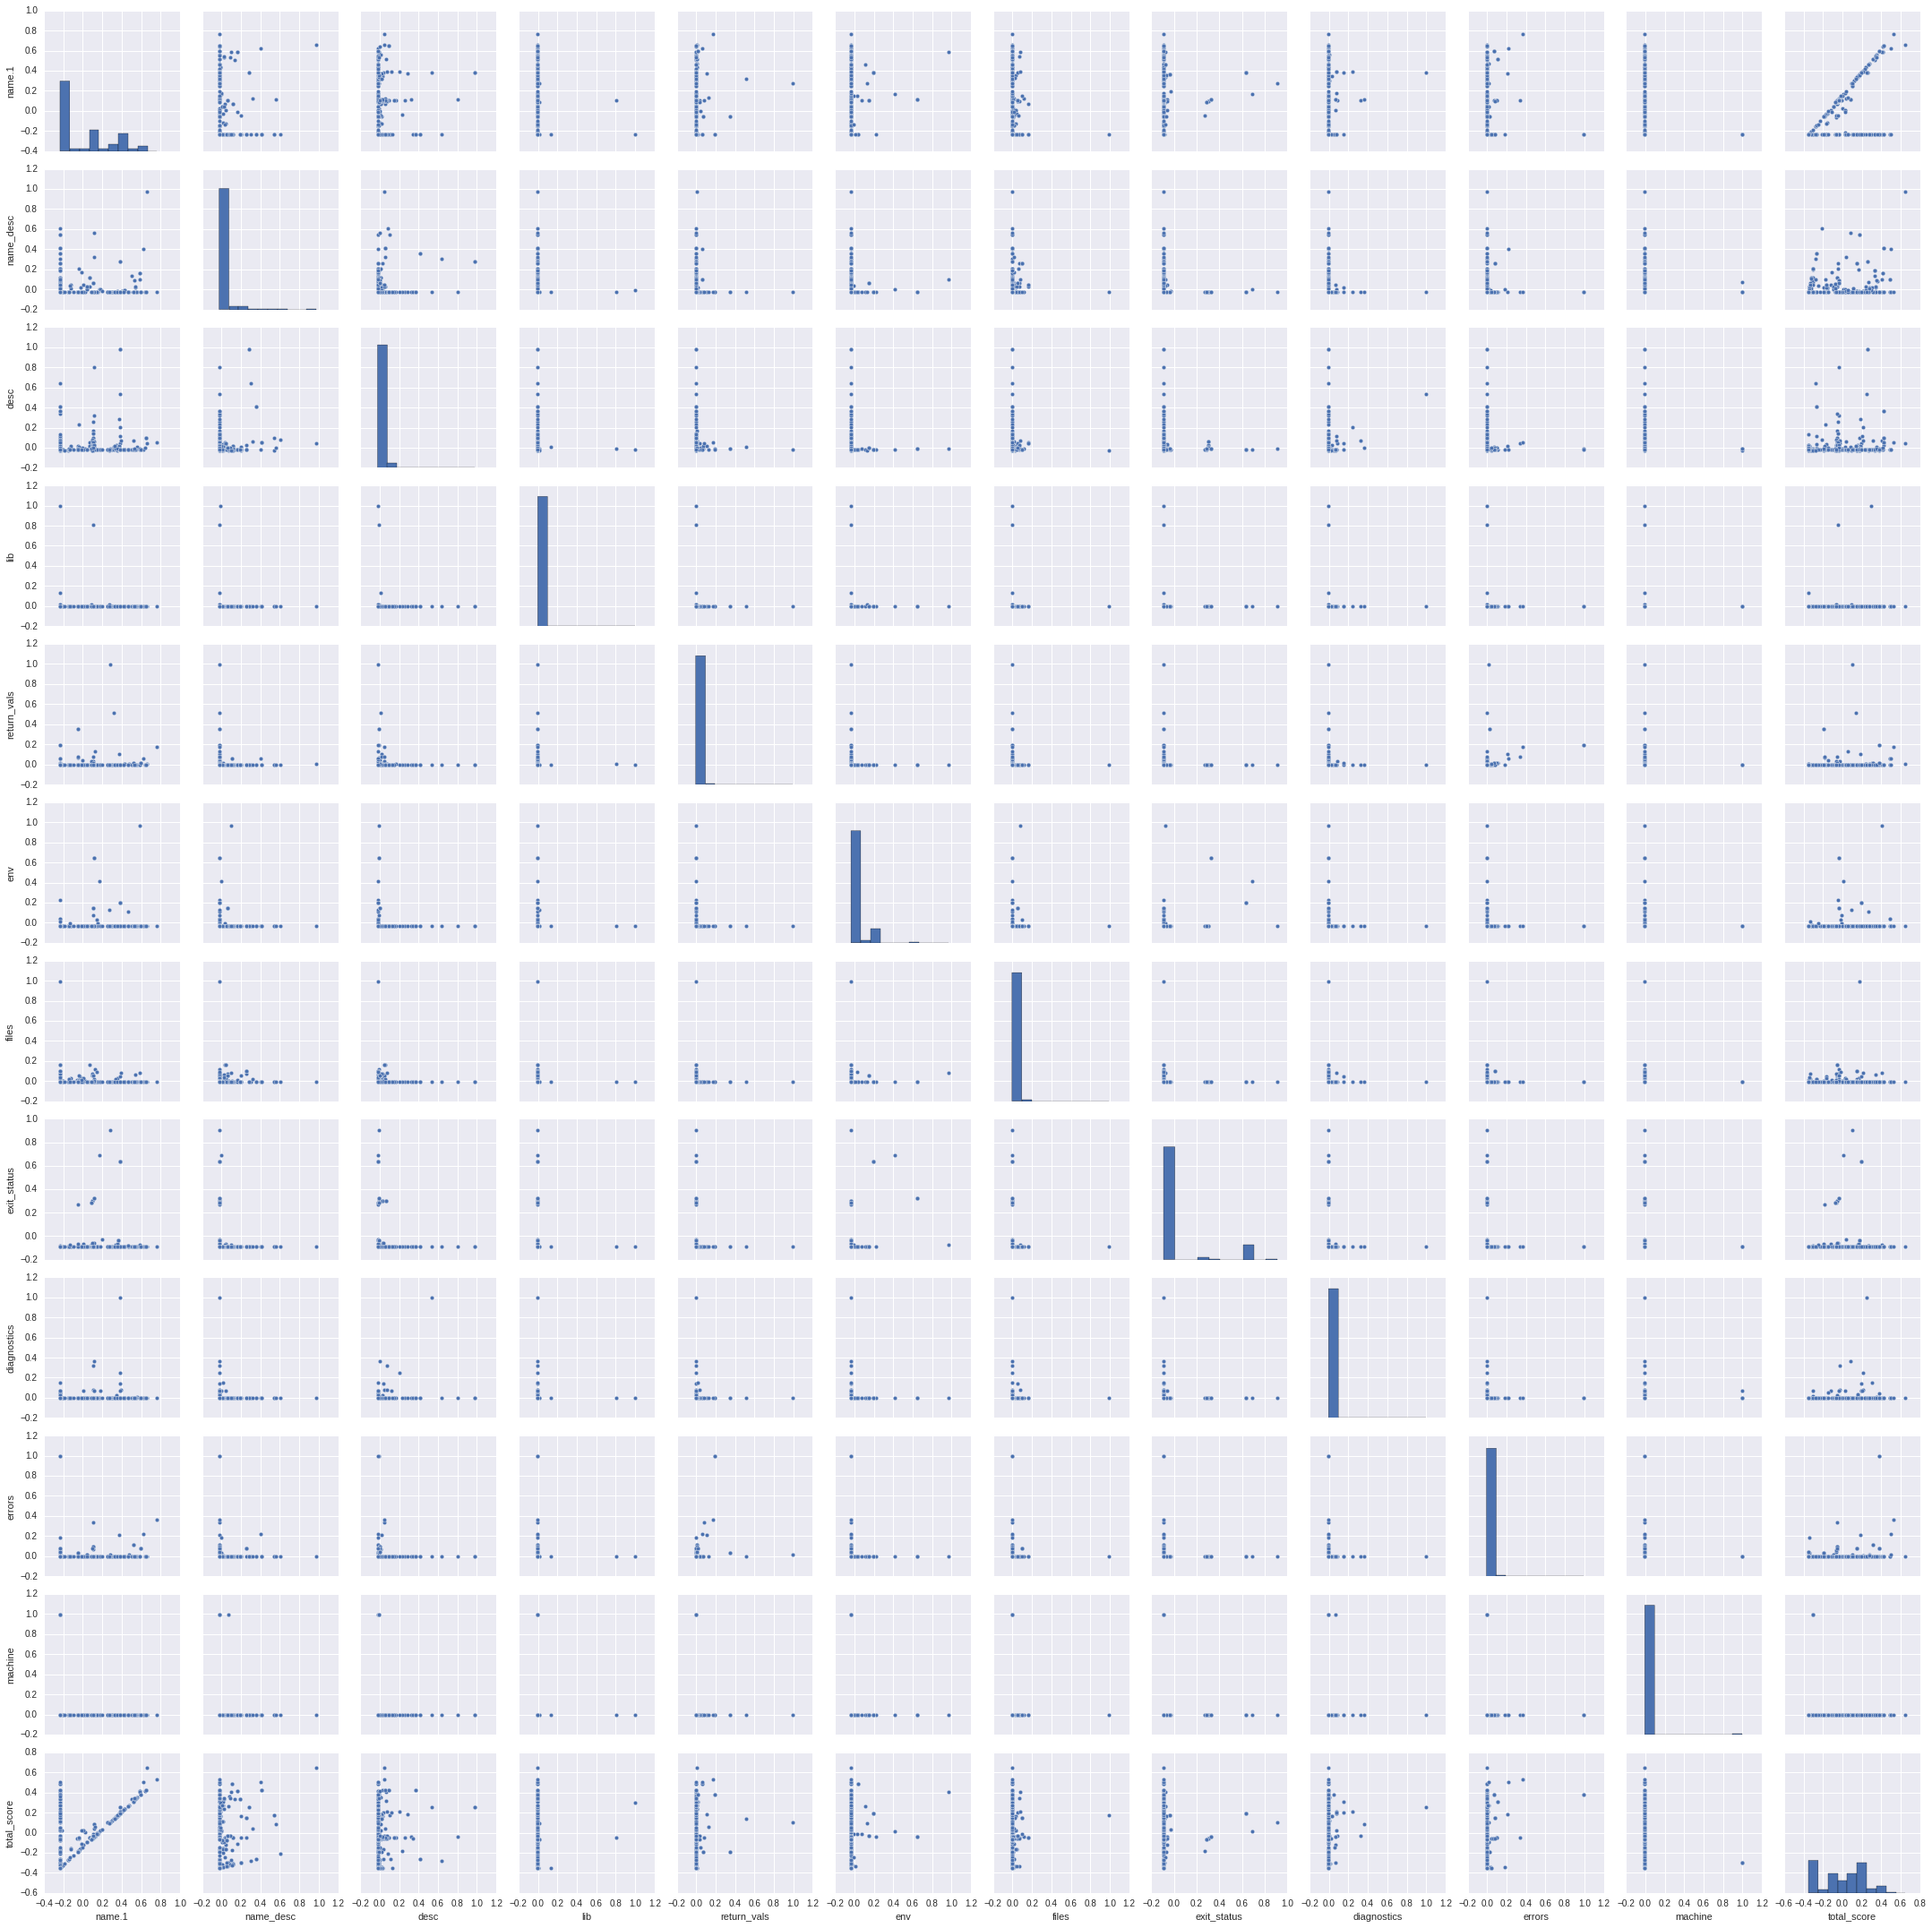

In [12]:
sns.pairplot(data_norm)